# Lab Session

## <font color='blue'> Table Of Contents </font>
- Problem Statement 
- Load required libraries
- Connect to DB using mysql-connector-python package
- Create database named `e_commerce`
- Create tables and insert data into tables as specified in the question
- Read all the questions and write sql queries to meet the objective 

## <font color='blue'> Problem Statement </font>
###  An E-commerce website manages its data in the form of various tables.
You need to create a Database called `e_commerce` and various tables in it. The tables needed and attributes which need to be in every table are given before hand. All you have to do is create tables with data in it and answer some of the questions that follows.

### e_commerce Schema:

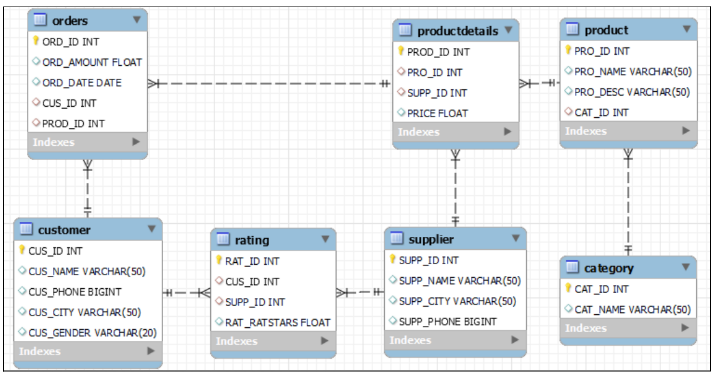

### Load Required Libraries

In [3]:
import mysql.connector
import pandas as pd

### Connect to DB using Mysql-connector-python package

In [4]:
connection = mysql.connector.connect(host="localhost",
                                    user = "root",
                                    password = "cupid2102")
print (connection)
connection.close()

### You are required to create a database named 'e_commerce'

In [5]:
connection = mysql.connector.connect(host="localhost",
                                    user = "root",
                                    password = "cupid2102")
cursorobject = connection.cursor()
cursorobject.execute("CREATE DATABASE e_commerce")

In [6]:
connection = mysql.connector.connect(host="localhost",
                                    user = "root",
                                    password = "cupid2102",
                                    database = "e_commerce")
cursorobject = connection.cursor()

### Q1. Create tables for supplier, customer, category, product, productDetails, order, rating to store the data for the E-commerce with the schema definition given below.


- **`supplier`**(SUPP_ID int primary key, SUPP_NAME varchar(50), SUPP_CITY varchar(50), SUPP_PHONE varchar(10))


- **`customer`** (CUS_ID INT NOT NULL, CUS_NAME VARCHAR(20) NULL DEFAULT NULL, CUS_PHONE VARCHAR(10), CUS_CITY varchar(30) ,CUS_GENDER CHAR,PRIMARY KEY (CUS_ID))


- **`category`** (CAT_ID INT NOT NULL, CAT_NAME VARCHAR(20) NULL DEFAULT NULL,PRIMARY KEY (CAT_ID))


- **`product`** (PRO_ID INT NOT NULL, PRO_NAME VARCHAR(20) NULL DEFAULT NULL, PRO_DESC VARCHAR(60) NULL DEFAULT NULL, CAT_ID INT NOT NULL,PRIMARY KEY (PRO_ID),FOREIGN KEY (CAT_ID) REFERENCES CATEGORY (CAT_ID))


- **`product_details`** (PROD_ID INT NOT NULL, PRO_ID INT NOT NULL, SUPP_ID INT NOT NULL, PROD_PRICE INT NOT NULL,
  PRIMARY KEY (PROD_ID),FOREIGN KEY (PRO_ID) REFERENCES PRODUCT (PRO_ID), FOREIGN KEY (SUPP_ID) REFERENCES SUPPLIER(SUPP_ID))
  
  
- **`order`** (ORD_ID INT NOT NULL, ORD_AMOUNT INT NOT NULL, ORD_DATE DATE, CUS_ID INT NOT NULL, PROD_ID INT NOT NULL,PRIMARY KEY (ORD_ID),FOREIGN KEY (CUS_ID) REFERENCES CUSTOMER(CUS_ID),FOREIGN KEY (PROD_ID) REFERENCES PRODUCT_DETAILS(PROD_ID))


- **`rating`** (RAT_ID INT NOT NULL, CUS_ID INT NOT NULL, SUPP_ID INT NOT NULL, RAT_RATSTARS INT NOT NULL,PRIMARY KEY (RAT_ID),FOREIGN KEY (SUPP_ID) REFERENCES SUPPLIER (SUPP_ID),FOREIGN KEY (CUS_ID) REFERENCES CUSTOMER(CUS_ID))

In [7]:
supplier = """CREATE TABLE supplier(SUPP_ID int primary key, SUPP_NAME varchar(50), 
              SUPP_CITY varchar(50), SUPP_PHONE varchar(15))"""
cursorobject.execute(supplier)

In [8]:
customer = """CREATE TABLE customer (CUS_ID INT NOT NULL,CUS_NAME VARCHAR(20) NULL DEFAULT NULL,CUS_PHONE VARCHAR(15),CUS_CITY varchar(30),
              CUS_GENDER CHAR,PRIMARY KEY (CUS_ID))"""
cursorobject.execute(customer)

In [2]:
category = """CREATE TABLE category(CAT_ID INT NOT NULL,CAT_NAME VARCHAR(20) NULL DEFAULT NULL,PRIMARY KEY (CAT_ID))"""
cursorobject.execute(category)

In [3]:
product = """CREATE TABLE product(PRO_ID INT NOT NULL,PRO_NAME VARCHAR(20) NULL DEFAULT NULL,PRO_DESC VARCHAR(60) NULL DEFAULT NULL, 
             CAT_ID INT NOT NULL,PRIMARY KEY (PRO_ID),FOREIGN KEY (CAT_ID) REFERENCES CATEGORY (CAT_ID))"""
cursorobject.execute(product)

In [4]:
product_details = """CREATE TABLE product_details(PROD_ID INT NOT NULL,PRO_ID INT NOT NULL, SUPP_ID INT NOT NULL,PROD_PRICE INT NOT NULL,                
                     PRIMARY KEY (PROD_ID),FOREIGN KEY (PRO_ID) REFERENCES PRODUCT (PRO_ID), FOREIGN KEY (SUPP_ID) REFERENCES SUPPLIER(SUPP_ID))"""
cursorobject.execute(product_details)

In [5]:
orders = """create table orders(ORD_ID int not null,ORD_AMOUNT int not null,ORD_DATE date,CUS_ID int not null,PROD_ID int not null, 
            primary key(ORD_ID),foreign key(CUS_ID)references customer(CUS_ID), foreign key(PROD_ID) references product_details(PROD_ID))"""
cursorobject.execute(orders)


In [6]:
rating = """CREATE TABLE rating(RAT_ID INT NOT NULL,CUS_ID INT NOT NULL,SUPP_ID INT NOT NULL,RAT_RATSTARS INT NOT NULL,PRIMARY KEY (RAT_ID),FOREIGN KEY (SUPP_ID) REFERENCES SUPPLIER (SUPP_ID),FOREIGN KEY (CUS_ID) REFERENCES CUSTOMER(CUS_ID))"""
cursorobject.execute(rating)

### Q2. Insert the following data in the table created above
#### `Note:` If you are getting any error while inserting the data into tables, Kindly close the connection and reconnect

#### Table:  supplier
| SUPP_ID | SUPP_NAME | SUPP_CITY | SUPP_PHONE |
| --- | --- | --- | --- | 
| 1 | Rajesh Retails | Delhi | 1234567890 |
| 2 | Appario Ltd. | Mumbai | 258963147032 | 
| 3 | Knome products | Bangalore | 9785462315 |
| 4 | Bansal Retails | Kochi | 8975463285 |
| 5 | Mittal Ltd. | Lucknow | 7898456532 |

In [7]:
# insert into "supplier" table

sql = "INSERT INTO supplier(SUPP_ID,SUPP_NAME,SUPP_CITY,SUPP_PHONE) VALUES(%s,%s,%s,%s)"
val = [(1,"Rajesh Retails",'Delhi',1234567890),(2,"Appario Ltd.",'Mumbai',258963147032),(3,"Knome products",'Bangalore',9785462315),
       (4,"Bansal Retails",'Kochi',8975463285),(5,"Mittal Ltd.",'Lucknow',7898456532)]
       
cursorobject.executemany(sql, val)
connection.commit()
print(cursorobject.rowcount, "record inserted.")


5 record inserted.


#### Table:  customer
| CUS_ID | CUS_NAME | SUPP_PHONE | CUS_CITY | CUS_GENDER
| --- | --- | --- | --- | --- |
| 1 | AAKASH | 9999999999 | DELHI | M |
| 2 | AMAN | 9785463215 | NOIDA | M |
| 3 | NEHA | 9999999998 | MUMBAI | F |
| 4 | MEGHA | 9994562399 | KOLKATA | F |
| 5 | PULKIT | 7895999999 | LUCKNOW | M |

In [8]:
# insert into "customer" table

sql = "INSERT INTO customer (CUS_ID,CUS_NAME,CUS_PHONE,CUS_CITY,CUS_GENDER) VALUES (%s,%s,%s,%s,%s)"
val = [(1,"AKASH",9999999999,'DELHI','M'),(2,"AMAN",9785463215,'NOIDA ','M'),(3,"NEHA",9999999998,'MUMBAI','F'),(4,"MEGHA",9994562399,'KOLKATA','F'),
       (5,"PULKIT",7895999999,'LUckNOW','M')]

cursorobject.executemany(sql, val)
connection.commit()
print(cursorobject.rowcount, "record inserted.")
       

5 record inserted.


#### Table:  category
| CAT_ID | CAT_NAME | 
| --- | --- |  
| 1 | BOOKS |
| 2 | GAMES |  
| 3 | GROCERIES | 
| 4 | ELECTRONICS | 
| 5 | CLOTHES | 

In [9]:
# insert into "categoty" table

sql = "INSERT INTO category(CAT_ID,CAT_NAME) VALUES (%s,%s)"
val = [(1,"BOOKS"),(2,"GAMES"),(3,"GROCERIES"),(4,"ELECTRONICS"),(5,"CLOTHES")]

cursorobject.executemany(sql, val)
connection.commit()
print(cursorobject.rowcount, "record inserted.")

5 record inserted.


#### Table:  product
| PRO_ID | PRO_NAME | PRO_DESC | CAT_ID |
| --- | --- | --- | --- | 
| 1 | GTA V | DFJDJFDJFDJFDJFJF | 2 |
| 2 | TSHIRT | DFDFJDFJDKFD | 5 | 
| 3 | ROG LAPTOP | DFNTTNTNTERND | 4 |
| 4 | OATS | REURENTBTOTH | 3 |
| 5 | HARRY POTTER | NBEMCTHTJTH | 1 |


In [10]:
# insert into "product" table

sql = "INSERT INTO product(PRO_ID,PRO_NAME,PRO_DESC,CAT_ID) VALUES (%s,%s,%s,%s)"
val = [(1,'GTA V','DFJDJFDJFDJFDJFJF',2),(2,'TSHIRT','DFDFJDFJDKFD',5),(3,'ROG LAPTOP','DFNTTNTNTERND',4),(4,'OATS','REURENTBTOTH',3),
       (5,'HARRY POTTER','NBEMCTHTJTH',1)]
       
cursorobject.executemany(sql, val)
connection.commit()
print(cursorobject.rowcount, "record inserted.")

5 record inserted.


#### Table:  product_details
| PROD_ID | PRO_ID | SUPP_ID | PROD_PRICE |
| --- | --- | --- | --- | 
| 1 | 1 | 2 | 1500 |
| 2 | 3 | 5 | 30000 | 
| 3 | 5 | 1 | 3000 |
| 4 | 2 | 3 | 2500 |
| 5 | 4 | 1 | 1000 |

In [11]:
# insert into "product_details" table

sql = "INSERT INTO product_details(PROD_ID,PRO_ID,SUPP_ID,PROD_PRICE) VALUES (%s,%s,%s,%s)"
val = [(1,1,2,1500),(2,3,5,30000),(3,5,1,3000),(4,2,3,2500),(5,4,1,1000)]

cursorobject.executemany(sql, val)
connection.commit()
print(cursorobject.rowcount, "record inserted.")


5 record inserted.


#### Table:  orders
| ORD_ID | ORD_AMOUNT | ORD_DATE | CUS_ID | PROD_ID
| --- | --- | --- | --- | --- |
| 20 | 1500 | 2021-10-12 | 3 | 5 |
| 25 | 30500 | 2021-09-16 | 5 | 2 |
| 26 | 2000 | 2021-10-05 | 1 | 1 |
| 30 | 3500 | 2021-08-16 | 4 | 3 |
| 50 | 2000 | 2021-10-06 | 2 | 1 |

In [13]:
# insert into "orders" table

sql = "INSERT INTO orders(ORD_ID,ORD_AMOUNT,ORD_DATE,CUS_ID,PROD_ID) VALUES (%s,%s,%s,%s,%s)"
val = [(20,1500,'2021-10-12',3,5 ),(25,30500,'2021-09-16',5,2),(26,2000,'2021-10-05',1,1),(30,3500,'2021-08-16',4,3),(50,2000,'2021-10-06',2,1)]
       
cursorobject.executemany(sql, val)
connection.commit()
print(cursorobject.rowcount, "record inserted.")

5 record inserted.


#### Table: rating
| RAT_ID | CUS_ID | SUPP_ID | RAT_RATSTARS |
| --- | --- | --- | --- | 
| 1 | 2 | 2 | 4 |
| 2 | 3 | 4 | 3 | 
| 3 | 5 | 1 | 5 |
| 4 | 1 | 3 | 2 |
| 5 | 4 | 5 | 4 |

In [14]:
# insert into "rating" table

sql = "INSERT INTO rating(RAT_ID,CUS_ID,SUPP_ID,RAT_RATSTARS) VALUES (%s,%s,%s,%s)"
val = [(1,2,2,4),(2,3,4,3),(3,5,1,5),(4,1,3,2),(5,4,5,4)]
       
cursorobject.executemany(sql, val)
connection.commit()
print(cursorobject.rowcount, "record inserted.")


5 record inserted.


### Q3) Display the number of the customer group by their genders who have placed any order of amount greater than or equal to Rs.3000.

In [3]:
import mysql.connector
import pandas as pd
connection = mysql.connector.connect(host="localhost",
                                    user = "root",
                                    password = "cupid2102",
                                    database = "e_commerce")
cursorobject = connection.cursor()

query = """select c.CUS_GENDER,count(c.CUS_ID) from CUSTOMER as c join (select CUS_ID from orders where ORD_AMOUNT >=3000) as Q on c.CUS_ID = Q.CUS_ID group by c.CUS_GENDER"""
cursorobject.execute(query)
output = cursorobject.fetchall()

output_df = pd.DataFrame(output,columns = ['CUS_GENDER','COUNT'])
output_df

,CUS_GENDER,COUNT
0,M,1
1,F,1


### Q4) Display all the order along with product name ordered by a customer having Customer_Id=2;

In [4]:
connection.close()

import mysql.connector
import pandas as pd
connection = mysql.connector.connect(host="localhost",
                                    user = "root",
                                    password = "cupid2102",
                                    database = "e_commerce")
cursorobject = connection.cursor()

query = """select orders.*,product.PRO_NAME from orders, product_details,product where orders.CUS_ID = 2 and 
           orders.PROD_ID = product_details.PROD_ID and product_details.PRO_ID = product.PRO_ID"""
cursorobject.execute(query)
output = cursorobject.fetchall()

output_df = pd.DataFrame(output,columns = ['ORD_ID','ORD_AMOUNT','ORD_DATE','CUS_ID','PROD_ID','PRO_NAME'])
output_df


,ORD_ID,ORD_AMOUNT,ORD_DATE,CUS_ID,PROD_ID,PRO_NAME
0,50,2000,2021-10-06,2,1,GTA V


### Q5) Display the Supplier details who can supply more than one product.

In [5]:
connection.close()

import mysql.connector
import pandas as pd
connection = mysql.connector.connect(host="localhost",
                                    user = "root",
                                    password = "cupid2102",
                                    database = "e_commerce")
cursorobject = connection.cursor()

query = """select supplier.* from supplier,product_details where supplier.SUPP_ID in (select product_details.SUPP_ID from product_details group by product_details.SUPP_ID having count(product_details.SUPP_ID)>1)
           group by supplier.SUPP_ID"""
cursorobject.execute(query)
output = cursorobject.fetchall()

output_df = pd.DataFrame(output,columns = ['SUPP_ID','SUPP_NAME','SUPP_CITY','SUPP_PHONE'])
output_df


,SUPP_ID,SUPP_NAME,SUPP_CITY,SUPP_PHONE
0,1,Rajesh Retails,Delhi,1234567890


### Q6) Find the category of the product whose order amount is minimum.

In [11]:
connection.close()

import mysql.connector
import pandas as pd
connection = mysql.connector.connect(host="localhost",
                                    user = "root",
                                    password = "cupid2102",
                                    database = "e_commerce")
cursorobject = connection.cursor()

query = """select category.* from orders inner join product_details on orders.PROD_ID = product_details.PROD_ID inner join product on product.PRO_ID = product_details.PRO_ID 
           inner join category on category.CAT_ID = product.CAT_ID having min(orders.ORD_AMOUNT)"""
cursorobject.execute(query)
output = cursorobject.fetchall()

output_df = pd.DataFrame(output,columns = ['CAT_ID','CAT_NAME'])
output_df


,CAT_ID,CAT_NAME
0,3,GROCERIES


### Q7) Display the Id and Name of the Product ordered after “2021-10-05”.

In [12]:
connection.close()

import mysql.connector
import pandas as pd
connection = mysql.connector.connect(host="localhost",
                                    user = "root",
                                    password = "cupid2102",
                                    database = "e_commerce")
cursorobject = connection.cursor()

query = """select product.PRO_ID,product.PRO_NAME from orders inner join product_details on product_details.PROD_ID = orders.PROD_ID
           inner join product on product.PRO_ID = product_details.PRO_ID where orders.ORD_DATE>"2021-10-05";"""
cursorobject.execute(query)
output = cursorobject.fetchall()

output_df = pd.DataFrame(output,columns = ['PRO_ID','PRO_NAME'])
output_df


,PRO_ID,PRO_NAME
0,4,OATS
1,1,GTA V


### Q8) Print the top 3 supplier name and id and rating on the basis of their rating along with the customer name who has given the rating.

In [4]:
connection.close()

import mysql.connector
import pandas as pd
connection = mysql.connector.connect(host="localhost",
                                    user = "root",
                                    password = "cupid2102",
                                    database = "e_commerce")
cursorobject = connection.cursor()

query = """select supplier.SUPP_ID,supplier.SUPP_NAME,customer.CUS_NAME,rating.RAT_RATSTARS from rating inner join supplier on rating.SUPP_ID = supplier.SUPP_ID 
           inner join customer on rating.CUS_ID = customer.CUS_ID order by rating.RAT_RATSTARS desc limit 3"""
cursorobject.execute(query)
output = cursorobject.fetchall()

output_df = pd.DataFrame(output,columns = ['SUPP_ID','SUPP_NAME','CUS_NAME','RAT_RATSTARS'])
output_df

,SUPP_ID,SUPP_NAME,CUS_NAME,RAT_RATSTARS
0,1,Rajesh Retails,PULKIT,5
1,2,Appario Ltd.,AMAN,4
2,5,Mittal Ltd.,MEGHA,4


### Q9) Display customer name and gender whose names start or end with character 'A'.

In [5]:
connection.close()

import mysql.connector
import pandas as pd
connection = mysql.connector.connect(host="localhost",
                                    user = "root",
                                    password = "cupid2102",
                                    database = "e_commerce")
cursorobject = connection.cursor()

query = "select CUS_NAME,CUS_GENDER from customer where CUS_NAME like 'A%' or CUS_NAME like '%A'"
cursorobject.execute(query)
output = cursorobject.fetchall()

output_df = pd.DataFrame(output,columns = ['CUS_NAME','CUS_GENDER'])
output_df

,CUS_NAME,CUS_GENDER
0,AKASH,M
1,AMAN,M
2,NEHA,F
3,MEGHA,F


### Q10) Display the total order amount of the male customers.

In [20]:
connection.close()

import mysql.connector
import pandas as pd
connection = mysql.connector.connect(host="localhost",
                                    user = "root",
                                    password = "cupid2102",
                                    database = "e_commerce")
cursorobject = connection.cursor()

query = """select sum(orders.ORD_AMOUNT) as TOTAL_ORDER_AMOUNT from orders inner join customer on orders.CUS_ID = customer.CUS_ID 
           where customer.CUS_GENDER = 'M'"""
cursorobject.execute(query)
output = cursorobject.fetchall()

output_df = pd.DataFrame(output,columns = ['TOTAL_ORDER_AMOUNT'])
output_df


,TOTAL_ORDER_AMOUNT
0,34500


### Q11) Display all the Customers left outer join with  the orders

In [18]:
connection.close()

import mysql.connector
import pandas as pd
connection = mysql.connector.connect(host="localhost",
                                    user = "root",
                                    password = "cupid2102",
                                    database = "e_commerce")
cursorobject = connection.cursor()

query = """select * from customer left outer join orders on customer.CUS_ID = orders.CUS_ID"""
cursorobject.execute(query)
output = cursorobject.fetchall()

output_df = pd.DataFrame(output,columns = ['CUS_ID','CUS_NAME','CUS_PHONE','CUS_CITY','CUS_GENDER','ORD_ID',
                                           'ORD_AMOUNT','ORD_DATE','CUS_ID','PROD_ID'])
output_df

,CUS_ID,CUS_NAME,CUS_PHONE,CUS_CITY,CUS_GENDER,ORD_ID,ORD_AMOUNT,ORD_DATE,CUS_ID,PROD_ID
0,1,AKASH,9999999999,DELHI,M,26,2000,2021-10-05,1,1
1,2,AMAN,9785463215,NOIDA,M,50,2000,2021-10-06,2,1
2,3,NEHA,9999999998,MUMBAI,F,20,1500,2021-10-12,3,5
3,4,MEGHA,9994562399,KOLKATA,F,30,3500,2021-08-16,4,3
4,5,PULKIT,7895999999,LUckNOW,M,25,30500,2021-09-16,5,2


**NOTE:** Always close an open connection once you are done with the database operations

## Happy Learning:)